# Modelos de regresion lineal
## simulacion
$y = a + bx$

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mtr

In [2]:
x = 1.5 + 2.5*np.random.randn(100)
res = 0 + 0.8*np.random.randn(100)
y_pred = 5 + 1.9*x
y_act = 5 + 1.9*x + res

In [3]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [4]:
data = pd.DataFrame(
{
    "x":x_list,
    'y_actual':y_act_list,
    'y_prediccion':y_pred_list
}
)
data

,x,y_actual,y_prediccion
0,6.256232,17.899735,16.886840
1,-3.276588,-0.535273,-1.225517
2,-0.636579,4.136283,3.790500
3,5.006892,15.333819,14.513094
4,-0.011688,4.741023,4.977793
...,...,...,...
95,3.211124,10.350724,11.101136
96,-0.752437,2.516997,3.570370
97,3.029812,11.518550,10.756643
98,5.344779,16.452487,15.155081


Text(0.5, 1.0, 'valor actual vs prediccion')

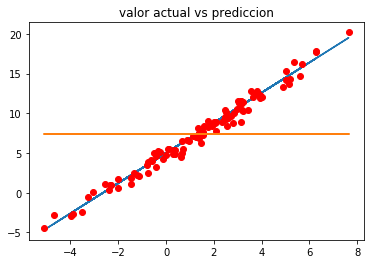

In [5]:
y_mean = [np.mean(y_act)  for i in range(1, len(x_list) + 1)]
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act, 'ro')
plt.plot(x,y_mean)
plt.title("valor actual vs prediccion")

In [6]:
import seaborn as snb

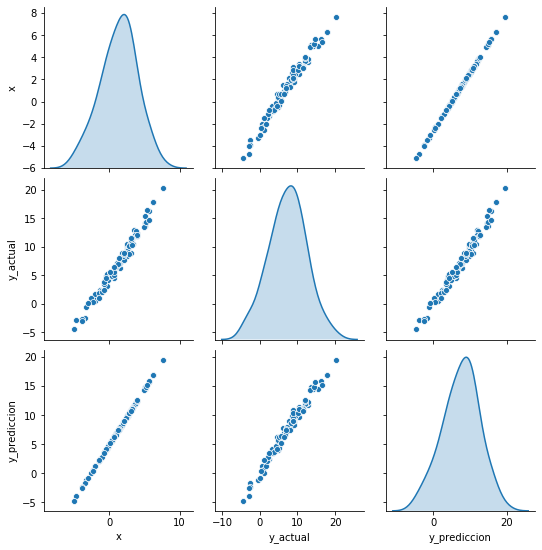

In [7]:
snb.pairplot(data, diag_kind= 'kde')

# Obtener la recta de regresion

In [8]:
data = pd.read_csv(r'D:\Escritorio\python courses\Curso Completo de machine learning data science in python\python-ml-course-master\datasets\ads\Advertising.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [9]:
lm = smf.ols('Sales~TV', data=data)
print(lm.fit().params)
print(lm.fit().summary())
np.sqrt(lm.fit().mse_resid)

Intercept    7.032594
TV           0.047537
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           1.47e-42
Time:                        15:38:44   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

3.258656368650463

#### Predicciones

In [10]:
sales_pred = lm.fit().predict(pd.DataFrame(data['TV']))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

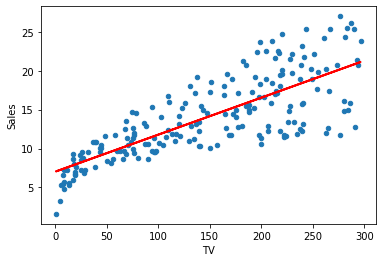

In [11]:
data.plot(kind='scatter', x='TV',y='Sales')
plt.plot(pd.DataFrame(data['TV']), sales_pred, c='red', linewidth=2)

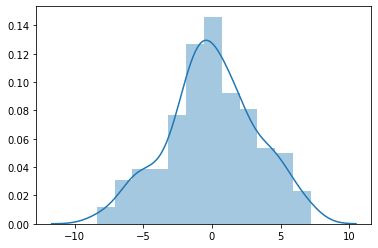

In [12]:
#plt.hist(lm.fit().resid, density= True)
snb.distplot(lm.fit().resid)

In [13]:
lm2 = smf.ols('Sales~TV+Newspaper', data=data).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           3.95e-45
Time:                        15:38:46   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.0

In [14]:
sales_predict = lm2.predict(data[['TV','Newspaper']])
sales_predict

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [15]:
np.sqrt(lm2.mse_resid)

3.120719860252886

### Multicolinealidad
**VIF**
    - VIF = 1 : las variables no estan correlacionadas
    - VIF < 5 : las variables tienen una correlacion moderada y se pueden quedar en el modelo
    - VIF > 5 : las variables estan altamente correlacionadas y deben desaparecer del modelo

In [16]:
# Newspaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
# TV ~ Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
# Radio ~ TV + Newspaper -> R^2 VIF = 1/(1-R^2)

In [17]:
lm_n = smf.ols('Newspaper ~ Radio + TV', data = data).fit()
rs_n=lm_n.rsquared
VIF= 1/(1-rs_n)
VIF

1.145187378723929

In [18]:
lm_n = smf.ols('TV ~ Radio + Newspaper', data = data).fit()
rs_n=lm_n.rsquared
VIF= 1/(1-rs_n)
VIF

1.0046107849396502

In [19]:
lm_n = smf.ols('Radio ~ TV + Newspaper', data = data).fit()
rs_n=lm_n.rsquared
VIF= 1/(1-rs_n)
VIF

1.1449519171055353

### Training & Testing

In [20]:
a = np.random.randn(len(data))

(array([ 3., 10., 25., 42., 43., 49., 17., 10.,  0.,  1.]),
 array([-2.92231865, -2.28649978, -1.65068091, -1.01486204, -0.37904318,
         0.25677569,  0.89259456,  1.52841343,  2.1642323 ,  2.80005116,
         3.43587003]),
 <a list of 10 Patch objects>)

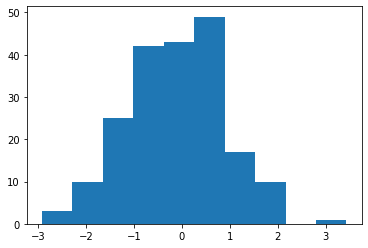

In [21]:
plt.hist(a)

In [22]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [23]:
len(training), len(testing)

(171, 29)

In [24]:
lm = smf.ols('Sales~TV+Radio', data= training).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     733.3
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           9.96e-84
Time:                        15:38:48   Log-Likelihood:                -327.79
No. Observations:                 171   AIC:                             661.6
Df Residuals:                     168   BIC:                             671.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8434      0.317      8.957      0.000       2.217       3.470
TV             0.0460      0.001     31.122      0.000       0.043       0.049
Radio          0.1868      0.009     21.365      0.000       0.170       0.204
==============================================================================
Omnibus:                       50.381   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.617
Skew:                          -1.240   Prob(JB):                     1.94e-28
Kurtosis:                       6.430   Cond. No.                         430.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Validacion

In [25]:
sales_p = lm.predict(testing)
np.sqrt(lm.mse_resid)

1.660020601713485

In [26]:
np.mean(np.abs(testing['Newspaper'] - sales_p))

18.093946183269384

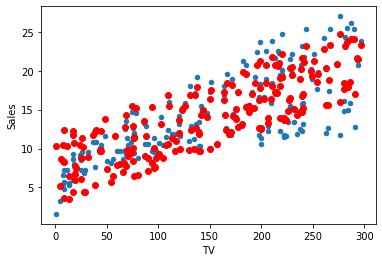

In [27]:
%matplotlib inline
data.plot(kind = 'scatter', x = 'TV', y = 'Sales')
plt.plot(pd.DataFrame(data['TV']), lm.predict(data), 'ro')

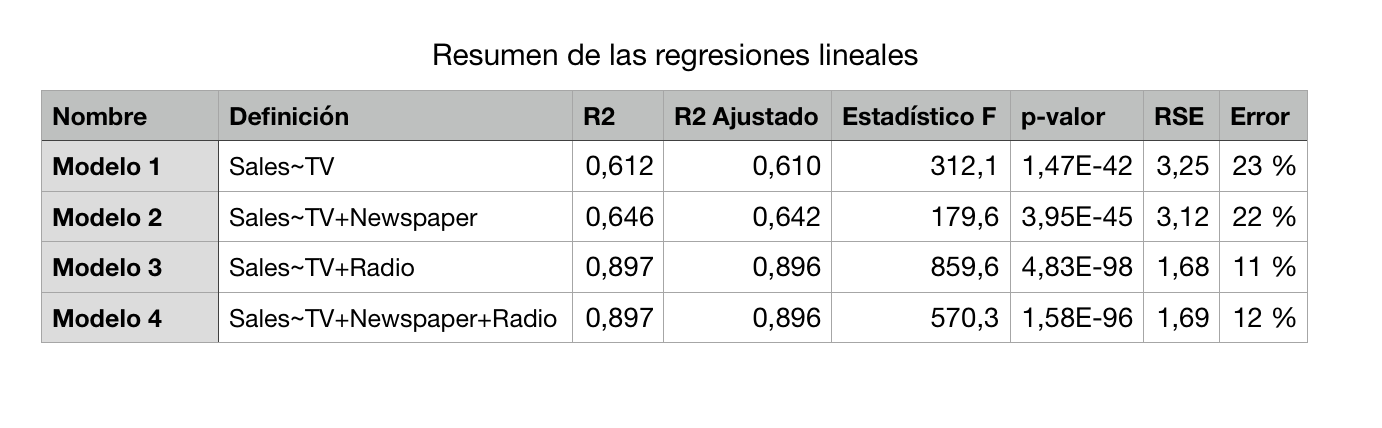

In [28]:
from IPython.display import Image
Image(r'D:\Escritorio\python courses\Curso Completo de machine learning data science in python\python-ml-course-master\notebooks\resources\summary-lm.png')

### Regresion con Scikir-learn

In [29]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [30]:
feature_cols = ['TV','Radio','Newspaper']

In [31]:
x = data[feature_cols]
y = data['Sales']

In [32]:
estimator = SVR(kernel='linear')
selector = RFE(estimator, 2, step = 1)
selector = selector.fit(x,y)

In [33]:
selector.support_

array([ True,  True, False])

In [34]:
selector.ranking_

array([1, 1, 2])

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
x_pred = x[['TV','Radio']]

In [37]:
lm = LinearRegression()
lm.fit(x_pred,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
lm.intercept_

2.9210999124051362

In [39]:
lm.coef_

array([0.04575482, 0.18799423])

In [40]:
lm.score(x_pred, y)

0.8971942610828956

### Variables categoricas

In [41]:
df = pd.read_csv(r'D:\Escritorio\python courses\Curso Completo de machine learning data science in python\python-ml-course-master\datasets\ecom-expense\Ecom Expense.csv')
df

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485
...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856


In [42]:
dummy_gender = pd.get_dummies(df['Gender'], prefix='Gender')
dummy_city = pd.get_dummies(df['City Tier'], prefix='City')

In [43]:
column_names = df.columns.values.tolist()

In [44]:
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [45]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [46]:
df_new = df_new[column_names].join(dummy_city)
df_new

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546,0,1,0,1,0
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136,0,1,0,1,0
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448,1,0,0,0,1
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856,1,0,1,0,0


### Forma Facil!!!

In [47]:
df_jess = pd.concat([df,pd.get_dummies(df['Gender']),pd.get_dummies(df['City Tier'])], axis=1)
df_jess

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Female,Male,Tier 1,Tier 2,Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546,0,1,0,1,0
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136,0,1,0,1,0
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448,1,0,0,0,1
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856,1,0,1,0,0


In [48]:
df_jess = df_jess.drop(['Gender','City Tier'], axis=1)

In [49]:
df_jess = df_jess.drop('Transaction ID', axis = 1)

In [50]:
df_jess

,Age,Items,Monthly Income,Transaction Time,Record,Total Spend,Female,Male,Tier 1,Tier 2,Tier 3
0,42,10,7313,627.668127,5,4198.385084,1,0,1,0,0
1,24,8,17747,126.904567,3,4134.976648,1,0,0,1,0
2,47,11,22845,873.469701,2,5166.614455,0,1,0,1,0
3,50,11,18552,380.219428,7,7784.447676,1,0,1,0,0
4,60,2,14439,403.374223,2,3254.160485,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2357,50,7,5705,460.157207,3,2909.619546,0,1,0,1,0
2358,35,11,11202,851.924751,8,7968.633136,0,1,0,1,0
2359,27,5,21335,435.145358,8,8816.406448,1,0,0,0,1
2360,45,12,19294,658.439838,7,7915.595856,1,0,1,0,0


In [51]:
x = df_jess.drop('Total Spend', axis = 1)
y = df_jess['Total Spend']

In [52]:
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
lm.intercept_

-643.7731838037525

In [54]:
lm.coef_

array([ 6.18968657e+00,  3.93442110e+01,  1.47731711e-01,  1.69048699e-01,
        7.71442188e+02, -1.31627781e+02,  1.31627781e+02,  6.98809779e+01,
        5.04144467e+01, -1.20295425e+02])

In [55]:
list(zip(x.columns,lm.coef_))

[('Age ', 6.189686573746984),
 (' Items ', 39.34421096996632),
 ('Monthly Income', 0.1477317109534427),
 ('Transaction Time', 0.16904869866852526),
 ('Record', 771.4421878591893),
 ('Female', -131.62778138807425),
 ('Male', 131.62778138807423),
 ('Tier 1', 69.88097793487287),
 ('Tier 2', 50.414446652043665),
 ('Tier 3', -120.29542458691651)]

In [56]:
lm.score(x,y)

0.922356824990408

In [57]:
p=lm.fit(x,y).predict(x)
p

array([4991.56838007, 4695.89393671, 5327.44486252, ..., 8865.1005151 ,
       8406.88578405, 6805.93639221])

In [58]:
mtr.mean_squared_error(p,y,squared=False)

779.9780219006585

### Eliminar variables dummy redundantes

In [59]:
dummy_gender = pd.get_dummies(df['Gender'], prefix='Gender').iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [60]:
dummy_city = pd.get_dummies(df['City Tier'], prefix='City').iloc[:,1:]
dummy_city

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
2357,1,0
2358,1,0
2359,0,1
2360,0,0


In [61]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city)
df_new

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546,1,1,0
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136,1,1,0
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448,0,0,1
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856,0,0,0


In [62]:
x = df_new.drop(['Total Spend', 'Transaction ID','Gender','City Tier'], axis = 1)
y = df_new['Total Spend']
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
print(lm.intercept_)

-705.5199872566354


In [64]:
lm.score(x,y)

0.922356824990408

In [65]:
list(zip(df_new.drop(['Total Spend', 'Transaction ID','Gender','City Tier'], axis = 1).columns.values,lm.coef_))

[('Age ', 6.189686573747078),
 (' Items ', 39.34421096996588),
 ('Monthly Income', 0.1477317109534232),
 ('Transaction Time', 0.1690486986685276),
 ('Record', 771.4421878591877),
 ('Gender_Male', 263.25556277615004),
 ('City_Tier 2', -19.466531282831138),
 ('City_Tier 3', -190.17640252178896)]

#### Transformacion de variables para conseguir relacion no lineal

In [66]:
data_auto = pd.read_csv(r'D:\Escritorio\python courses\Curso Completo de machine learning data science in python\python-ml-course-master\datasets\auto\auto-mpg.csv')
data_auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


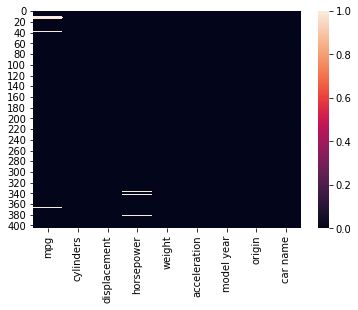

In [67]:
snb.heatmap(data_auto.isna())

Text(0, 0.5, 'Consumo')

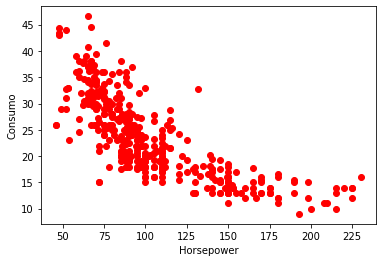

In [68]:
%matplotlib inline
data_auto['mpg']=data_auto['mpg'].dropna()
data_auto['horsepower']=data_auto['horsepower'].dropna()
plt.plot(data_auto['horsepower'], data_auto['mpg'], 'ro')
plt.xlabel('Horsepower')
plt.ylabel('Consumo')

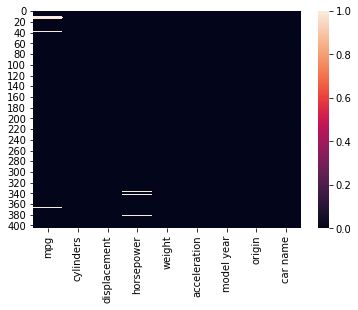

In [69]:
snb.heatmap(data_auto.isna())

In [70]:
x = data_auto['horsepower'].fillna(data_auto['horsepower'].mean())
y = data_auto['mpg'].fillna(data_auto['mpg'].mean())
lm = LinearRegression()
lm.fit(x[:, np.newaxis],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

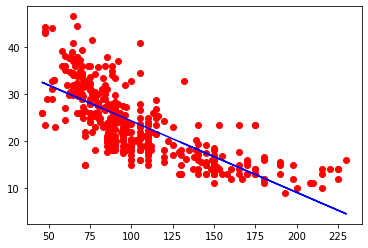

In [71]:
%matplotlib inline
plt.plot(x,y, 'ro')
plt.plot(x,lm.predict(x[:, np.newaxis]), color = 'blue')

In [72]:
xs = x[:, np.newaxis]
lm.score(xs,y)

0.574653340645025

In [73]:
mtr.mean_squared_error(lm.predict(xs),y, squared=False)

5.040660280088646

In [74]:
x_data = x**2
x_data = x_data[:, np.newaxis]
lm = LinearRegression()
lm.fit(x_data, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
lm.score(x_data, y)

0.4849887034823205

In [76]:
# lineal y cuadratico
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [77]:
poly = PolynomialFeatures(degree = 2)

In [78]:
x_data = poly.fit_transform(xs)

In [79]:
lm = linear_model.LinearRegression()
lm.fit(x_data, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
lm.score(x_data,y)

0.6439066584257469